# **ExoEvo**
A 1-D tool for simulating thermal evolution of model planets.

------

## **Thermal Evolution 101:** Qualitative
Planetary interiors cool over time. As they cool, their interiors become more and more **viscous** (resistant to flow). At some point in a planet's lifetime, mantle **convection** becomes so inefficient that **conduction** becomes the dominant mode of heat transport through the planetary interior. A strictly-conductive planet can be considered geologically dead, since only convection enables large-scale geochemical cycling and delivery of fresh material to planetary surfaces.

A planet's cooling rate depends on its heat **sources and sinks.** Sources include the exponential decay of radionuclides, any gravitational energy released as heat during accretion and differentiation, and heat generated from tidal dissipation. The mode by which heat is most efficiently transferred (convection or conduction) controls the efficiency with which that heat can be emitted, thus guiding the sink term.

------

## **Thermal Evolution 201:** Quantitative

Boundary-layer theory suggests that the heat flux across a (stagnant-lid) planetary surface should be proportional to the vigor of convection within its interior. This relationship is often explained using a scaling law relating two unitless quantities, the **Nusselt Number** ($Nu$) and **Rayleigh Number** ($Ra$), by an exponent $\beta \approx$ 1/3:

### $Nu \propto Ra^{\beta}$

The Nusselt number is most simply described as the relative efficiency of convective heat transfer compared to a strictly conductive transfer regime. 
### $Nu=\frac{Q}{k A\left(T_{i} / d\right)}$
where:
* $ Nu = $ Nusselt number, unitless
* $ Q = $ convective heat flux, W/m$^{2}$
* $ k = $ thermal conductivity, W m$^{-1}$ K$^{-1}$
* $ A = $ surface area through which heat flows, m$^{2} \approx 4 \pi R_{p}^{2} $
* $ T_{i} = $ mantle potential temperature, K
* $ d = $ depth/thickness of convecting mantle, m  $ \approx R_{p}-R_{c} $


### $Ra=\frac{\alpha \rho g T_{i} d^{3}}{\kappa \eta\left(T_{i}\right)}\text{        }$ or $\text{         }Ra=\frac{\alpha C_{p} \rho^{2} g T_{i} d^{3}}{k \eta\left(T_{i}\right)}$
where:
* $ Ra = $ Rayleigh number, unitless
* $ \alpha = $ thermal expansivity, 1/K
* $ \rho = $ density, kg/m$^{3}$
* $ g = $ surface gravity, m/s$^{2}$ 
* $ T_{i} = $ mantle potential temperature, K
* $ d = $ depth/thickness of convecting mantle, m  $ \approx R_{p}-R_{c} $
* $ \kappa = $ thermal diffusivity, m$^{2}$/s = $ \left( k  / (\rho C_{p})\right)$
* $ k = $ thermal conductivity, W m$^{-1}$ K$^{-1}$
* $ C_{p} = $ specific heat capacity, J kg$^{-1}$ K$^{-1}$
* $ \eta\left(T_{i}\right) =  $ viscosity at temperature $T_{i}$, Pa s

[comment]: <> (add derivation, followed by translation to generalizable terms e.g. Mp, CMF, Rp, CRF)

------

## **Thermal Evolution 301:** Temperature-dependent
Each thermal and thermo-mechanical property listed above (i.e. thermal diffusivity $\kappa$, thermal conductivity $k$, heat capacity $C_{p}$, and thermal expansivity $\alpha$) is a result of the planet's composition and structure. These properties vary with temperature, but most 1-D thermal evolution models assume a **single, static value** for each variable. One notable exception is temperature-dependent viscosity $\eta\left(T_{i}\right)$, which is often expanded to an Arrhenius form:

### $\eta\left(T_{i}\right) = \eta_{n} exp({\frac{E_{a}}{RT_{i}}})$
where:
* $ \eta\left(T_{i}\right) =  $ viscosity at temperature $T_{i}$, Pa s - *material-dependent*
* $ \eta_{n} =  $ viscosity prefactor, Pa s - *material-dependent*
* $ E_{a} =  $ activation energy for diffusion creep, kJ/mol - *material-dependent*
* $ R = $ ideal gas constant = 8.314 J/(mol K)
* $ T_{i} = $ mantle potential temperature, K

[comment]: <> (explain how Foley & Smye 2018 eq.3+4 follows from Nu-Ra scaling - include Frank-Kamenetskii)

**A static-value approach for $\kappa, k, C_{p},$ and $\alpha$ is largely sufficient for studies of Earth's thermal evolution.** After all, Earth's maximum cooling lifetime is limited by our Sun's main-sequence lifetime. 4.5 billion years down... 8 billion years to go! However, most detected rocky exoplanets orbit M-dwarf stars, which mature and brighten almost imperceptibly over billion-year timescales. Around such a long-lived star, an exoplanet's interior could experience a much wider range of internal temperatures and dynamical regimes. **A more dynamic approach may help to identify more subtle variations within and between exoplanetary thermal evolution pathways.** In addition, planets whose internal composition drastically differs from Earth's will likely behave differently in both a thermodynamic and rheological sense.

[comment]: <> (perhaps calculate max and min plausible Cp above whatever Tp connects to ~Ra_crit for each mineral included so far?)
[comment]: <> (would show how, e.g., a particularly high influx of heat early on could be pivotal depending on composition, OR depending on starting T for a single composition)

------

## **Thermal Evolution 401:** Dependencies in Practice
Given all this, how do *composition, compositional uncertainty,* and *temperature sensitivities in thermal behavior* shape the long-term thermal evolution of planetary interiors?

From this question, many sub-questions arise. Some are tractable with **forward models** like this one. Some require **inversion methods**, in which hundreds of forward model results are compared to an actual dataset, to narrow down what range of model inputs most readily explains the observed outputs.

Among the sub-questions which may be answerable with a well-designed set of evolutionary paths:
* Without any external forcings, how long could a temperate-surface rocky planet remain geologically active?
* How sensitive are planets of a given bulk composition to varying initial conditions, e.g. radionuclide abundance or starting temperature?
* How do planets of differing composition respond to the same initial conditions? When do their thermal histories tend to converge or diverge?
* If we want to probe a planet's history for external forcing events... what minerals (and associated stellar refractory element ratios) would allow for a given thermal regime at a given planetary age?
* Alternatively, to test if planet and stellar properties are correlated... what minerals and radionuclide abundances would allow for a given thermal regime at a given planetary age? Are those compositions reasonable and consistent with stellar refractory element ratios?

**`ExoEvo` is hoping to ease such multi-dimensional investigations.** It's also hoping to provide programming neophytes with a decent open-source template for a well-documented, human-readable, modular, version-controlled, web-accessible scientific widget. It will eventually include a series of workflows for streamlining data analysis and model grid generation. But for now, it's just a widget, and a widget in progress at that. So...

<h3>

```diff
- Interpret all outputs with caution.
```

</h3>


------

## Last little details...

#### Model Options for **'method'** variable:
* **'dynamic'** - calculates $\alpha, Cp,$ and $k$ for a given bulk mineralogy, adjusting them and $\eta\left(T_{i}\right)$ for temperature dependencies at each timestep
* **'static'** - $\alpha, Cp,$ and $k$ are set to static reference values from a single mantle potential temperature; $\eta\left(T_{i}\right)$ is still adjusted at each timestep
* **'benchmark'** - $\alpha, Cp,$ and $k$ are set to common benchmark values for mantle olivine; $\eta\left(T_{i}\right)$ is adjusted at each timestep

[comment]: <> (static values are currently only one mineralogy from Foley & Smye 2018, DOI:10.1089/ast.2017.1695... need to add Ev/visc0/c1 for others)

[comment]: <> (* 'dorn' - Benchmark case: Dorn, et al. 2018, DOI:10.1051/0004-6361/201731513)
[comment]: <> (* 'foley' - Benchmark case: Foley and Smye 2018, DOI:10.1089/ast.2017.1695)
[comment]: <> (* 'korenaga' - Benchmark case: Korenaga 2006, DOI:10.1029/164GM03)

#### Model Options for **'mineral'** variable:
* 'C2/c' ( hpc Enstatite )
* 'Wus' ( Periclase )
* 'Pv' ( Mg-Perovskite )
* 'an' ( Anorthite )
* 'O' ( Forsterite )
* 'Wad' ( Mg-Wadsleyite )
* 'Ring' ( Mg-Ringwoodite )
* 'Opx' ( Enstatite )
* 'Cpx' ( Clinoenstatite )
* 'Aki' ( Akimotoite )
* 'Gt_maj' ( Majoritic Garnet )
* 'Ppv' ( Mg post-perovskite )
* 'CF' ( Mg-Clinoferrosilite )
* 'st' ( Stishovite )
* 'q' ( Quartz )
* 'ca-pv' ( Ca-perovskite )
* 'cfs' ( hpc Ferrosilite )
* 'coe' ( Coesite )
* 'ky' ( Kyanite )
* 'seif' ( Seifertite )


#### Column numbers in **Evolution** output array:
0.  time in Ga
1.  temperature in K
2.  Rayleigh number
3.  radiogenic heat produced
4.  heat loss through surface
5.  Urey ratio = heat production/heat loss

------

## Import external and internal packages.
Note that all internal packages are `___.py` files, and are found in the same directory as this file (`ExoEvo.ipynb`).

In [1]:
#Import external packages
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline


#Import internal packages
import evolve
import fromexo
import getall as get
import printall as prnt
from printall import Pe as Pe #print scientific notation, 4 decimal
from printall import Pf as Pf #print float, 4 decimal
from mineralDB import minerals as minerals 

## User input values:

You can design your own composition, or start with a sample planet output from ExoPlex. Mantles are treated as a linear mixture of their components.

If ExoPlex is 'TRUE', ExoEvo imports **radius** and **compositional** info from the file provided. 
If ExoPlex is 'FALSE', ExoEvo calculates internal structure from a user-provided radius **Rpl** and mass **Mpl**. The mantle is assumed to have **my_composition**.

Note that if **Pref** (reference pressure for thermal calculations) is zero, reference pressure (for thermodynamic parameters) is assumed to be **0.5 x CMB pressure.**

In [2]:
ExoPlex='TRUE'
ExoPlexFile='earth_nomantleFe_FeMg0.9_0.07_0.9_0.09_0.9.csv'  

Mpl=1.0             #Planet mass in Me - usually between 0.5 and 5. ignored if ExoPlex = 'TRUE' Earth = 1.0
Rpl=1.0             #Relative heat production per kg mantle, vs Earth  Earth = 1.0
Qp=1.0              #Planet's starting radiogenic abundance, per kg mantle
method='dynamic'    #'static', 'dynamic', or 'benchmark' thermal parameters
Tp0=2000            #starting mantle potential temperature in K        Earth = 2000.0 (initial), 1650 (present)
Pref=5.0            #reference pressure for thermal calculations, in GPa. If Pref=0, Pref is set to half the CMB pressure.
tmax=4.55           #ending time, in Ga - how long to cool the planet         Earth = 4.55

my_composition = {'C2/c':5.605938492, 'Wus':0.196424301, 'Pv':58.03824705, 'an':0.00, \
               'O':0.249338793, 'Wad':0.072264906, 'Ring':0.028707673, 'Opx':14.88882685, \
               'Cpx':1.099284717, 'Aki':0.0000703828958617, 'Gt_maj':9.763623743, 'Ppv':6.440039009, \
               'CF':0.00, 'st':0.00, 'q':0.00, 'ca-pv':3.617239801, \
               'cfs':0.00, 'coe':0.00, 'ky':0.00, 'seif':0.00}

### Build your mantle and acquire its unchanging material properties.
Note: this section is on the verge of being modularized and taken out-of-sight -- but it will be still be accessible in the .py files!

In [3]:
if (ExoPlex == 'TRUE'):
    file=ExoPlexFile
    Mp,Mc,Rp,Rc,d,Vm,Sa,pm,g,Pcmb,Tcmb=fromexo.build(file=file,Tp0=Tp0)
    startline=1000 #This is where the core stops and the mantle begins, in that file.
    composition = fromexo.bulk_mass_fraction(file,startline)

if (ExoPlex == 'FALSE'): # Build your own planet mode. Compositions in weight fraction/percent.
    Mp,Mc,Rp,Rc,d,Vm,Sa,pm,g,Pcmb,Tcmb=get.build(Mpl=Mpl,Rpl=Rpl,Tp0=Tp0)
    composition=my_composition   # All solid solutions are represented by their Mg endmembers.

if Pref==0:
    Pref=0.5*Pcmb

composition=get.adds_up(composition)
thermals=get.thermals_at_P_ave(composition,Pref)
c1,Ev,visc0=get.TdepVisc(composition)

params={"Mp":Mp,"Mc":Mc,"CMF":Mc/Mp,\
        "Rp":Rp,"Rc":Rc,"CRF":Rc/Rp,\
        "d":d,"Vm":Vm,"Sa":Sa,\
        "pm":pm,"g":g,"Pcmb":Pcmb,\
        "c1":c1,"Ev":Ev,"visc0":visc0}

prnt.unchanging(params, composition)


Planet mass:	 5.9700e+24 kg
Core mass:	 1.9721e+24 kg
Planet radius:	 6.3707e+06 m
Core radius:	 3.3742e+06 m
Mantle depth:	 2.9965e+06 m
Surface area:	 5.1002e+14 m2
Density:	 4335.3932 kg m-3
Surf gravity:	 9.8172 m s-2
Visc constant:	 1.0000
Activ. energy:	 3.0000e+05 J/mol
Visc prefactor:	 4.0000e+10 Pa s

Mantle composition:
C2/c 	 2.1492 %
Wus 	 4.8426 %
Pv 	 55.7236 %
O 	 4.3044 %
Wad 	 1.4131 %
Ring 	 0.6384 %
Opx 	 6.5543 %
Cpx 	 2.3045 %
Gt_maj 	 9.1217 %
Ppv 	 7.1170 %
ca-pv 	 5.8312 %


# Evolve your planet over time.

FINAL VALUES:
time	 temp(K) 	Rayleigh 	RadioHeat(W)	HeatLoss(W) 	UreyRatio
4.5600 	 1594.2292 	 2.1993e+08 	 8.4261e+12 	 1.3719e+13 	 0.6142



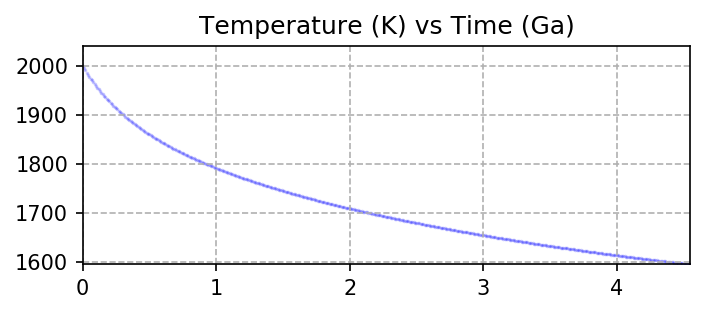

In [4]:
Tp=Tp0
Ts=300.0
dt=0.01
Hts=[]             #A list of lists; column names are in get.keys['columns']
t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.


while t <= tmax:

    if method=='dynamic': alpha,cp,k=get.Tdep_thermals(thermals,Tp)
    if method=='static': alpha,cp,k=get.Tdep_thermals(thermals,1600.)
    if method=='benchmark': alpha,cp,k,pm=3.7e-5,1250.,5.0,3340. #common benchmark values
    
    viscT=get.viscosity(Ev,visc0,Tp)
    Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)
    
    production=evolve.produce_heat(Mp,Mc,Qp,t)
    loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
    dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
    Hts.append([t,Tp,Ra,production,loss,production/loss])
    
    Tp=Tp+dTp
    t=t+dt

Evolution=np.asarray(Hts)

print("FINAL VALUES:")
print('time\t temp(K) \tRayleigh \tRadioHeat(W)\tHeatLoss(W) \tUreyRatio')
print(Pf(t), '\t', Pf(Tp), '\t', Pe(Ra), '\t',  Pe(production), '\t', Pe(loss),  '\t', Pf(production/loss))
print()

Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (K) vs Time (Ga)")

# Compare approaches to calculating $C_p$ and $\alpha$.

FINAL VALUES:
method		 temp(K) 	Rayleigh 	HeatLoss(W) 	UreyRatio
dynamic   	 1594.2292 	 2.1993e+08 	 1.3719e+13 	 0.6142
static   	 1594.8653 	 2.2240e+08 	 1.3782e+13 	 0.6114
benchmark   	 1604.8386 	 1.5375e+08 	 1.2359e+13 	 0.6818


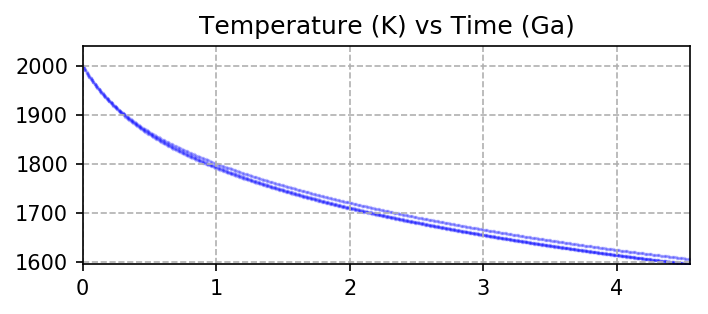

In [5]:
methods=('dynamic','static','benchmark')    #static or dynamic thermal parameters
Tp=Tp0
Ts=300.0
dt=0.01
Hts=[]             #A list of lists; column names are in get.keys['columns']
t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.

print("FINAL VALUES:")
print('method\t\t temp(K) \tRayleigh \tHeatLoss(W) \tUreyRatio')

for method in methods:
    
    Tp=Tp0
    Ts=300.0
    dt=0.01
    t=0.0  
    
    while t <= tmax:
        
        if method=='dynamic': alpha,cp,k=get.Tdep_thermals(thermals,Tp)
        if method=='static': alpha,cp,k=get.Tdep_thermals(thermals,1600.)
        if method=='benchmark': alpha,cp,k,pm=3.7e-5,1250.,5.0,3340. #common benchmark values

        viscT=get.viscosity(Ev,visc0,Tp)
        Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)

        production=evolve.produce_heat(Mp,Mc,Qp,t)
        loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
        dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
        Hts.append([t,Tp,Ra,production,loss,production/loss])

        Tp=Tp+dTp
        t=t+dt
        
    print(method, '  \t', Pf(Tp), '\t', Pe(Ra), '\t',  Pe(loss),  '\t', Pf(production/loss))

Evolution=np.asarray(Hts)
Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (K) vs Time (Ga)")
#Rayleighs=evolve.plot_heat(Evolution[:,(0,2)],"Rayleigh number vs Time (Ga)")



# Compare differing bulk compositions.

FINAL VALUES:
mineral	 alpha 		Cp 	temp(K) 	Rayleigh 	HeatLoss(W) 	UreyRatio
C2/c 	 3.9143e-05 1312.7674 	 1601.0692 	 1.6154e+08 	 1.2498e+13 	 0.6742
Wus 	 4.1825e-05 1338.7316 	 1597.1712 	 1.6610e+08 	 1.2545e+13 	 0.6717
Pv 	 3.4740e-05 1333.4383 	 1607.7284 	 1.6069e+08 	 1.2593e+13 	 0.6691
an 	 1.2869e-05 1162.7403 	 1665.3414 	 1.1779e+08 	 1.2295e+13 	 0.6853
O 	 3.2037e-05 1288.2548 	 1612.0894 	 1.5264e+08 	 1.2455e+13 	 0.6765
Wad 	 3.3445e-05 1305.4325 	 1609.6255 	 1.5573e+08 	 1.2496e+13 	 0.6743
Ring 	 2.8475e-05 1286.5628 	 1618.7139 	 1.4923e+08 	 1.2477e+13 	 0.6753
Opx 	 2.8288e-05 1269.0006 	 1618.6526 	 1.4609e+08 	 1.2388e+13 	 0.6802
Cpx 	 3.4037e-05 1291.0031 	 1608.6919 	 1.5460e+08 	 1.2449e+13 	 0.6768
Aki 	 2.9699e-05 1293.5974 	 1616.1521 	 1.5077e+08 	 1.2475e+13 	 0.6754
Gt_maj 	 2.6266e-05 1277.8511 	 1623.5242 	 1.4659e+08 	 1.2486e+13 	 0.6748
Ppv 	 4.7968e-05 1409.6821 	 1589.8234 	 1.7968e+08 	 1.2745e+13 	 0.6611
CF 	 3.9143e-05 1312.7674 	 1601.0

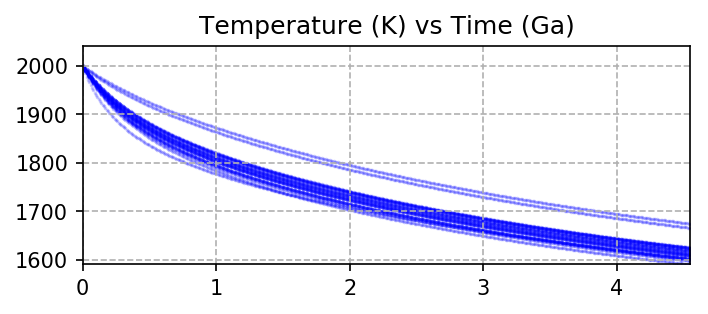

In [6]:
method='dynamic'
Tp=Tp0
Ts=300.0
dt=0.01
Hts=[]             #A list of lists; column names are in get.keys['columns']
t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.

print("FINAL VALUES:")
print('mineral\t alpha \t\tCp \ttemp(K) \tRayleigh \tHeatLoss(W) \tUreyRatio')

for m in minerals:
    
    if m=='SiC' or m=='graphite':
        break  #These do not have full implementation here yet.
        
    onemin = {m:1.0}
    composition = onemin
    c1,Ev,visc0=get.TdepVisc(composition)

    Tp=Tp0
    Ts=300.0
    dt=0.01
    t=0.0 

    thermals=get.thermals_at_P_ave(composition,Pref)

    start=time.time()
    while t <= tmax:

        if method=='dynamic': alpha,cp,k=get.Tdep_thermals(thermals,Tp)
        if method=='static': alpha,cp,k=get.Tdep_thermals(thermals,1625)

        viscT=get.viscosity(Ev,visc0,Tp)
        Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)

        production=evolve.produce_heat(Mp,Mc,Qp,t)
        loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
        dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
        Hts.append([t,Tp,Ra,production,loss,production/loss])

        Tp=Tp+dTp
        t=t+dt

    print(m, '\t', Pe(alpha), Pf(cp), '\t', Pf(Tp), '\t', Pe(Ra), '\t',  Pe(loss),  '\t', Pf(production/loss))

Evolution=np.asarray(Hts)

Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (K) vs Time (Ga)")
#Rayleighs=evolve.plot_heat(Evolution[:,(0,2)],"Rayleigh number vs Time (Ga)")
#Heat_loss=evolve.plot_heat(Evolution[:,(0,4)],"Heat loss (W) vs Time (Ga)")
#Heat_production=evolve.plot_heat(Evolution[:,(0,3)],"Heat production (W) vs Time (Ga)")